In [3]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import tqdm

In [4]:
FOLDER = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\streamlit\data"

def open_datasets(type):
    df =  pd.concat([pd.read_pickle(os.path.join(FOLDER, f"{type}_{i}.pkl")) for i in range(3)])
    df = df
    return df

cloudless = open_datasets("cloudless").set_index(['scene', 'season', 'roi', 'patch'])
cloudy = open_datasets("cloudy").set_index(['scene', 'season', 'roi', 'patch'])

In [22]:
def get_ndwi(df):
    return (df['2_mean'] - df['8_mean']) / (df['2_mean'] + df['8_mean'])

def get_ndvi(df):
    return (df['7_mean'] - df['3_mean']) / (df['7_mean'] + df['3_mean'])


cloudy['ndwi'] = get_ndwi(cloudy)
cloudy['ndvi'] = get_ndvi(cloudy)

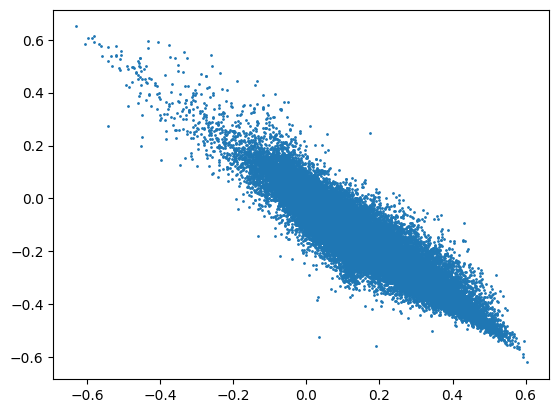

In [24]:
plt.scatter(cloudy['ndvi'], cloudy['ndwi'], s=1)